In [1]:
import numpy as np

In [2]:
def piecewise_trapezoid(f, a, b, n=100):
    x = np.linspace(a, b, n + 1)
    dx = x[1] - x[0]
    return (f(x).sum() - 0.5 * f(x[0]) - 0.5 * f(x[-1])) * dx

In [4]:
def f(x):
    return 4 / (1 + x**2)
piecewise_trapezoid(f, 0, 1, n=10000)

3.1415926519231268

In [6]:
def gauss_quad(f, a, b, n=25):
    ti, wi = np.polynomial.legendre.leggauss(n)    
    xi = 0.5 * (a + b) + 0.5 * (b - a) * ti
    return (wi * f(xi)).sum() * (b - a) * 0.5

In [7]:
gauss_quad(f, 0, 1)

3.1415926535897936

In [8]:
def piecewise_gauss_quad(f, a, b, n=100, deg=5):
    x = np.linspace(a, b, n + 1)
    fs = [gauss_quad(f, x[i], x[i+1], b) for i in range(n)]
    return np.array(fs).sum()

In [9]:
import sympy as sp

In [10]:
w0, w1, x0, x1, omega = sp.symbols('w0 w1 x0 x1 omega')

In [11]:
eqs = [
    w0 + w1 - 2,
    w0 * x0 + w1 * x1,
    w0 * x0**2 + w1 * x1**2 - 2./3.,
    w0 * x0**3 + w1 * x1**3
]


In [13]:
a = sp.nonlinsolve(eqs, [w0, w1, x0, x1])

In [15]:
a

{(1.0, 1.0, -0.577350269189626, 0.577350269189626), (1.0, 1.0, 0.577350269189626, -0.577350269189626)}

In [16]:
np.polynomial.legendre.leggauss(2)

(array([-0.57735027,  0.57735027]), array([1., 1.]))

# 计算不同强子的产额比

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

df = pd.read_csv('DATA_FILES/hadron_table.csv')

In [2]:
df.head()

,Unnamed: 0,pdg,name,mass,decay_width,2*spin+1,isbaryon,strange_num,charge_num,eta
0,0,211,Pion(+),0.13957,0.0,1,0,0,1,-1.0
1,1,111,Pion(0),0.13498,0.0,1,0,0,0,-1.0
2,2,-211,Pion(-),0.13957,0.0,1,0,0,-1,-1.0
3,3,321,Kaon(+),0.49368,0.0,1,0,1,1,-1.0
4,4,-321,Kaon(-),0.49368,0.0,1,0,-1,-1,-1.0


In [3]:
def fdist(p, T, m, spin_dof, eta):
    E = np.sqrt(p**2 + m**2)
    return spin_dof / (np.exp(E / T) + eta) * p**2 * 4 * np.pi / (2 * np.pi * 0.1973)**3
# 极坐标

In [4]:
from scipy.integrate import quad

def par_num(T, m, spin_dof, eta):
    return quad(fdist, 0, 50 * T, args=(T, m, spin_dof, eta))[0]

[]

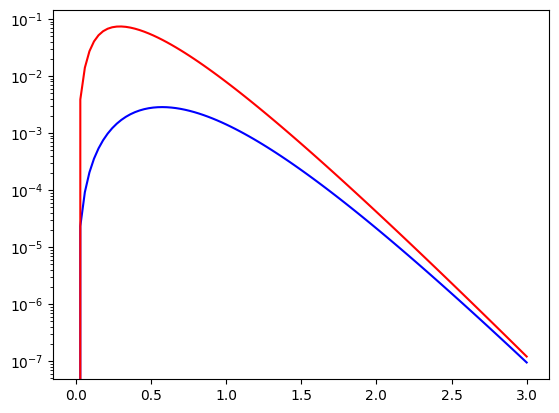

In [5]:
p = np.linspace(0, 3, 100) # GeV
T = 0.150 # GeV

f_proton = fdist(p, T, 0.938, 2, 1)
f_pion = fdist(p, T, 0.138, 1, -1)

plt.plot(p, f_proton, 'b', p, f_pion, 'r')
plt.semilogy()

In [6]:
proton = par_num(T, 0.938, 2, 1)

In [7]:
pion = par_num(T, 0.138, 1, -1)

In [8]:
pion / proton

18.519109587220985

In [9]:
kaon = par_num(T, 0.4936, 1, -1)

In [11]:
pion / kaon

3.993168094002329

# 计算统计物理公式

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from scipy.integrate import quad

df = pd.read_csv('DATA_FILES/hadron_table.csv')

In [2]:
for i in range(319):
    par = df.iloc[i, :]
    print(par["mass"])

0.13957
0.13498
0.13957
0.49368
0.49368
0.49765
0.49765
0.54775
0.7758
0.7758
0.7758
0.78259
0.89166
0.89166
0.8961
0.8961
0.93827
0.93957
0.95778
0.9741
0.9847
0.9847
0.9847
1.01946
1.11568
1.17
1.18937
1.19264
1.19745
1.2295
1.2295
1.2295
1.23
1.23
1.23
1.232
1.232
1.232
1.232
1.273
1.273
1.273
1.273
1.2754
1.2818
1.294
1.3
1.3
1.3
1.31483
1.32131
1.3183
1.3183
1.3183
1.376
1.376
1.376
1.3828
1.3837
1.3872
1.4
1.402
1.402
1.402
1.402
1.4065
1.414
1.414
1.414
1.414
1.4103
1.412
1.412
1.412
1.412
1.419
1.4263
1.4256
1.4256
1.4324
1.4324
1.44
1.44
1.465
1.465
1.465
1.474
1.474
1.474
1.476
1.507
1.5195
1.52
1.52
1.525
1.5318
1.535
1.535
1.535
1.6
1.6
1.6
1.6
1.6
1.617
1.63
1.63
1.63
1.63
1.653
1.653
1.653
1.655
1.655
1.66
1.66
1.66
1.67
1.667
1.67
1.67
1.67
1.67
1.6724
1.6724
1.6724
1.67243
1.675
1.675
1.68
1.685
1.685
1.6888
1.6888
1.6888
1.69
1.69
1.69
1.7
1.7
1.7
1.7
1.7
1.7
1.71
1.71
1.715
1.717
1.717
1.717
1.717
1.72
1.72
1.72
1.72
1.72
1.75
1.75
1.75
1.773
1.773
1.773
1.773
1.775
1

In [3]:
def pressure(T, nhardron=319):
    def integrand(p, T, m, spin_dof, eta):
        coef = eta * T * spin_dof / 2 / np.pi**2
        E = np.sqrt(p**2 + m**2)
        return coef * p**2 * np.log(1 + eta * np.exp(-E / T)) / 0.1973**3
    
    res = 0.0
    
    for i in range(nhardron):
        par = df.iloc[i, :]
        res += quad(integrand, 0, T * 500, args=(T, par["mass"], par["2*spin+1"], par["eta"]))[0]
        
    return res

In [4]:
pressure(0.150)

0.040882302708144774

In [5]:
def energy_density(T, nhardron=319):
    def integrand(p, T, m, spin_dof, eta):
        coef = spin_dof / 2 / np.pi**2
        E = np.sqrt(p**2 + m**2)
        return coef * p**2 * E / (eta + np.exp(E / T)) / 0.1973**3
    
    res = 0.0
    
    for i in range(nhardron):
        par = df.iloc[i, :]
        res += quad(integrand, 0, T * 500, args=(T, par["mass"], par["2*spin+1"], par["eta"]))[0]
        
    return res

In [6]:
energy_density(0.15, 1)

0.019587197811961155